<a href="https://colab.research.google.com/github/souadkhailia/Drug-Type-Prediction-Project/blob/main/Drug_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [155]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import set_config
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')


In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [157]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [158]:
# Load in the data
fpath = "/content/drive/MyDrive/data/Belt2_A_drugtype_v2_final.csv"
#fpath = "Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
# Preview first 5 rows
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


## **1.1) The information included in the data?**

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


In [160]:
# Get the number of rows (records) and columns (features)
num_rows, num_columns = df.shape
# Print the results
print(f"Number of features (columns): {num_columns}")
print(f"Number of records (rows): {num_rows}")

Number of features (columns): 6
Number of records (rows): 296


In [161]:
# Get data type information for each feature
data_types = df.dtypes

# Count the occurrences of each data type
data_type_counts = data_types.value_counts()

# Print the results
print("There was a mixture of datatypes:")
for dtype, count in data_type_counts.items():
    print(f"{count} {dtype}")

There was a mixture of datatypes:
5 object
1 float64


In [162]:
# the list the features of each data type
for dtype in data_type_counts.index:
    features = df.select_dtypes(include=[dtype]).columns
    if len(features) > 0:
        print(f"{len(features)} {dtype} features: {', '.join(features)}")

5 object features: Gender, BP, Cholesterol, Na_to_K, Drug
1 float64 features: Age


### Inspecting Object Columns for Numeric Features

In [163]:
# Preview all object columns
df.select_dtypes("object").head()

,Gender,BP,Cholesterol,Na_to_K,Drug
0,M,High,HIGH,13.935,drugQ
1,F,Normal,HIGH,10.103,drugZ
2,M,Normal,HIGH,9.084,drugZ
3,M,Normal,HIGH,16.594,drugZ
4,F,High,NORMAL,10.977,drugQ


In [164]:
df['Na_to_K'] = pd.to_numeric(df["Na_to_K"], errors='coerce').astype(float)
df.select_dtypes("object").head()

,Gender,BP,Cholesterol,Drug
0,M,High,HIGH,drugQ
1,F,Normal,HIGH,drugZ
2,M,Normal,HIGH,drugZ
3,M,Normal,HIGH,drugZ
4,F,High,NORMAL,drugQ


In [165]:
# the list the features of each data type
for dtype in data_type_counts.index:
    features = df.select_dtypes(include=[dtype]).columns
    if len(features) > 0:
        print(f"{len(features)} {dtype} features: {', '.join(features)}")

4 object features: Gender, BP, Cholesterol, Drug
2 float64 features: Age, Na_to_K


## **1.2) How clean is the data?**

### Are there any features with inconsistent values?

#### Checking Categorical Features for Inconsistencies

In [166]:
# Identify string columns
obj_cols = df.select_dtypes("object").columns
obj_cols

Index(['Gender', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [167]:
# Obtain the value counts for all string columns
for col in obj_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Gender
M         149
F         137
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64


Value Counts for BP
High      142
Normal     46
Low        33
Name: BP, dtype: int64


Value Counts for Cholesterol
HIGH      156
NORMAL    117
norm        9
high        8
NORM        6
Name: Cholesterol, dtype: int64


Value Counts for Drug
drugQ    148
drugZ    148
Name: Drug, dtype: int64




In [168]:
# Standardize the values
df['Gender'] = df['Gender'].replace({'M':"Male",'male':'Male','female':'Female','F':'Female','femal':'Female','Femal':'Female'})
df['Gender'].value_counts()

Male      154
Female    142
Name: Gender, dtype: int64

In [169]:
df['Cholesterol'] = df['Cholesterol'].replace({'high':"HIGH",'NORM':'NORMAL','norm':'NORMAL'})
df['Cholesterol'].value_counts()


HIGH      164
NORMAL    132
Name: Cholesterol, dtype: int64

#### Checking Numeric Features for Consistency

In [170]:
df.describe().round(2)

,Age,Na_to_K
count,237.00,295.00
mean,47.52,14.72
std,37.70,6.37
min,15.00,6.27
25%,32.00,10.45
50%,45.00,12.86
75%,59.00,16.74
max,570.00,38.25


In [171]:
(df['Age'] > 100).sum()

1

In [172]:
df['Age'] = df['Age'].replace({570:57})

df.describe().round(2)

,Age,Na_to_K
count,237.00,295.00
mean,45.36,14.72
std,16.13,6.37
min,15.00,6.27
25%,32.00,10.45
50%,45.00,12.86
75%,59.00,16.74
max,74.00,38.25


### Are there duplicate rows?

In [173]:
# Include the first row along with all dupicates
duplicated_rows = df.duplicated()
duplicated_rows.sum()

15

In [174]:
# Drop exact duplicates
df = df.drop_duplicates()
# Confirm no more duplicates
df.duplicated().sum()

0

### Are there missing values?


In [175]:
## Check for Null values
null_counts = df.isna().sum()
null_counts

Age            54
Gender          0
BP             75
Cholesterol     0
Na_to_K         1
Drug            0
dtype: int64

In [176]:
# Getting nulls as percent of total vallues
null_percent = null_counts/len(df) * 100
null_percent

Age            19.217082
Gender          0.000000
BP             26.690391
Cholesterol     0.000000
Na_to_K         0.355872
Drug            0.000000
dtype: float64

In [177]:
## Combining null_counts and null_percent above
null_report = pd.DataFrame({'# Null':null_counts,
                            '% Null':null_percent}).round(2)
null_report

,# Null,% Null
Age,54,19.22
Gender,0,0.00
BP,75,26.69
Cholesterol,0,0.00
Na_to_K,1,0.36
Drug,0,0.00


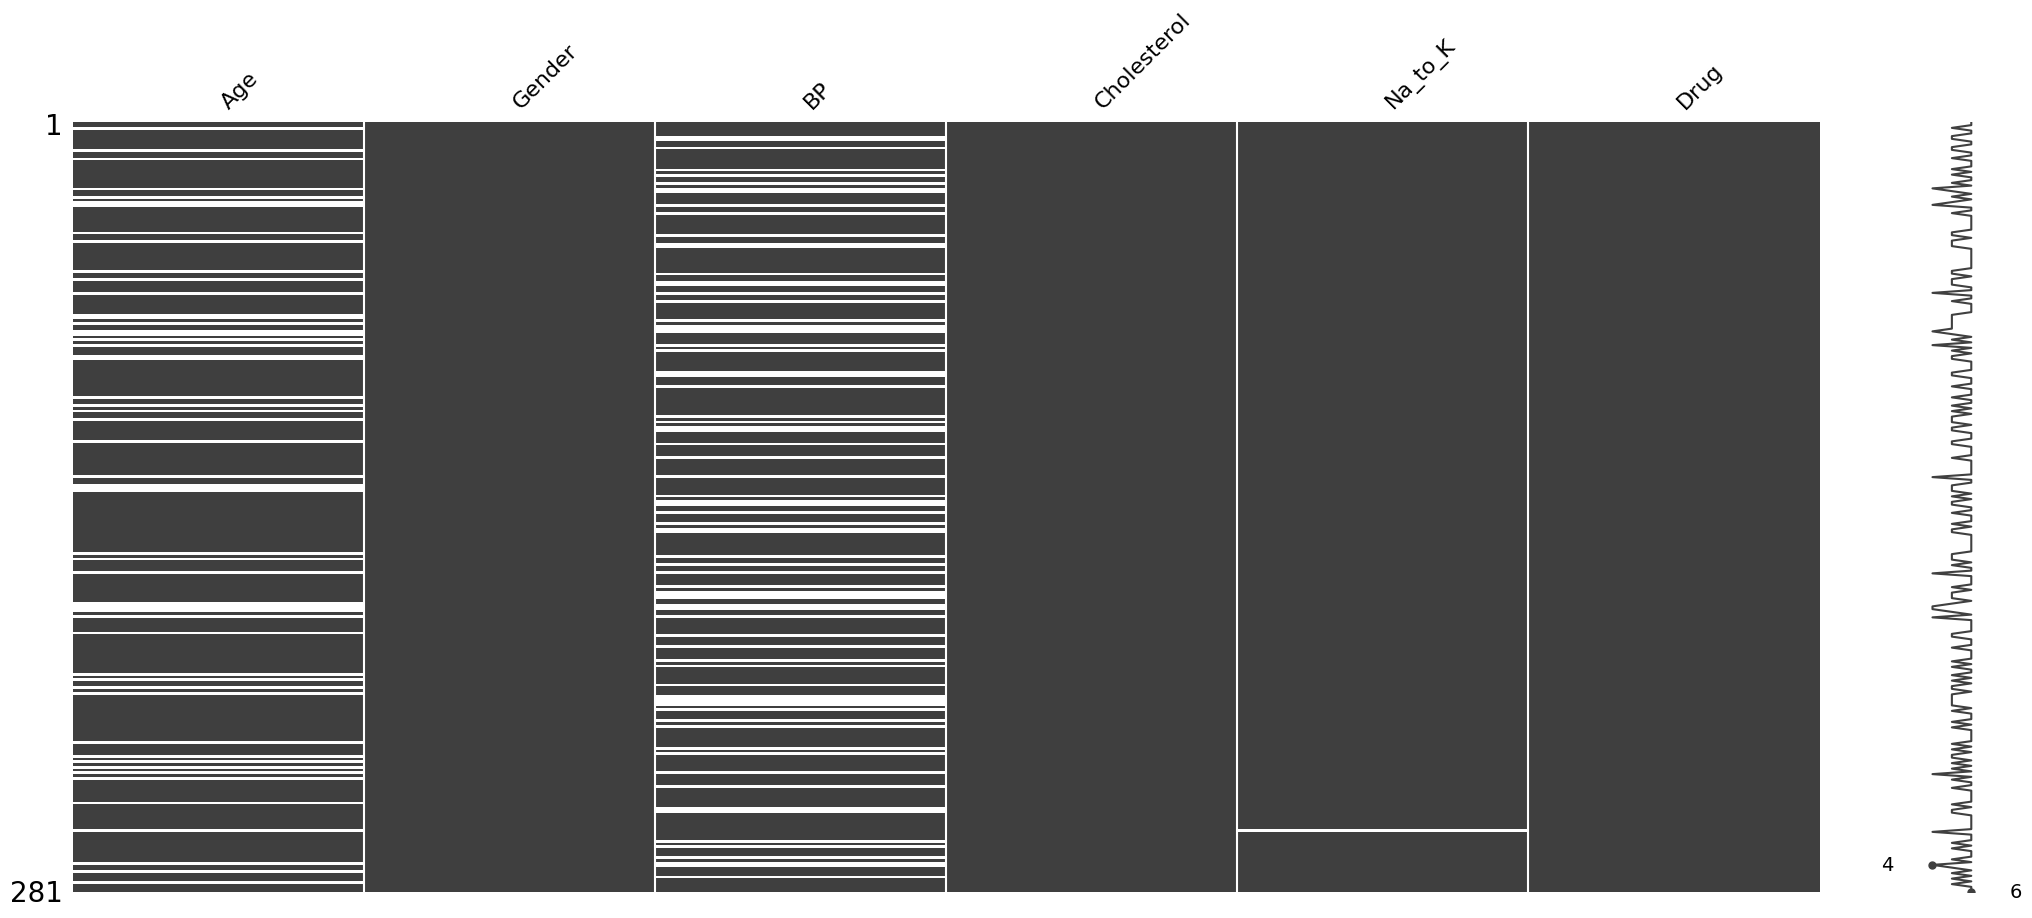

In [178]:
# Visualizing Missing Values with missingno
# Using missingno to view heatmap of NaN's
import missingno as msno
msno.matrix(df);

## 2) What do the features look like and how are they related?</b></p>


In [179]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(df.columns) :
    nunique =df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in original dataset : \n')
print(table)

Unique values in original dataset : 

+-------------+---------------+
|   Features  | Unique Values |
+-------------+---------------+
|     Age     |       58      |
|    Gender   |       2       |
|      BP     |       3       |
| Cholesterol |       2       |
|   Na_to_K   |      182      |
|     Drug    |       2       |
+-------------+---------------+


In [180]:
from scipy.stats import chi2_contingency

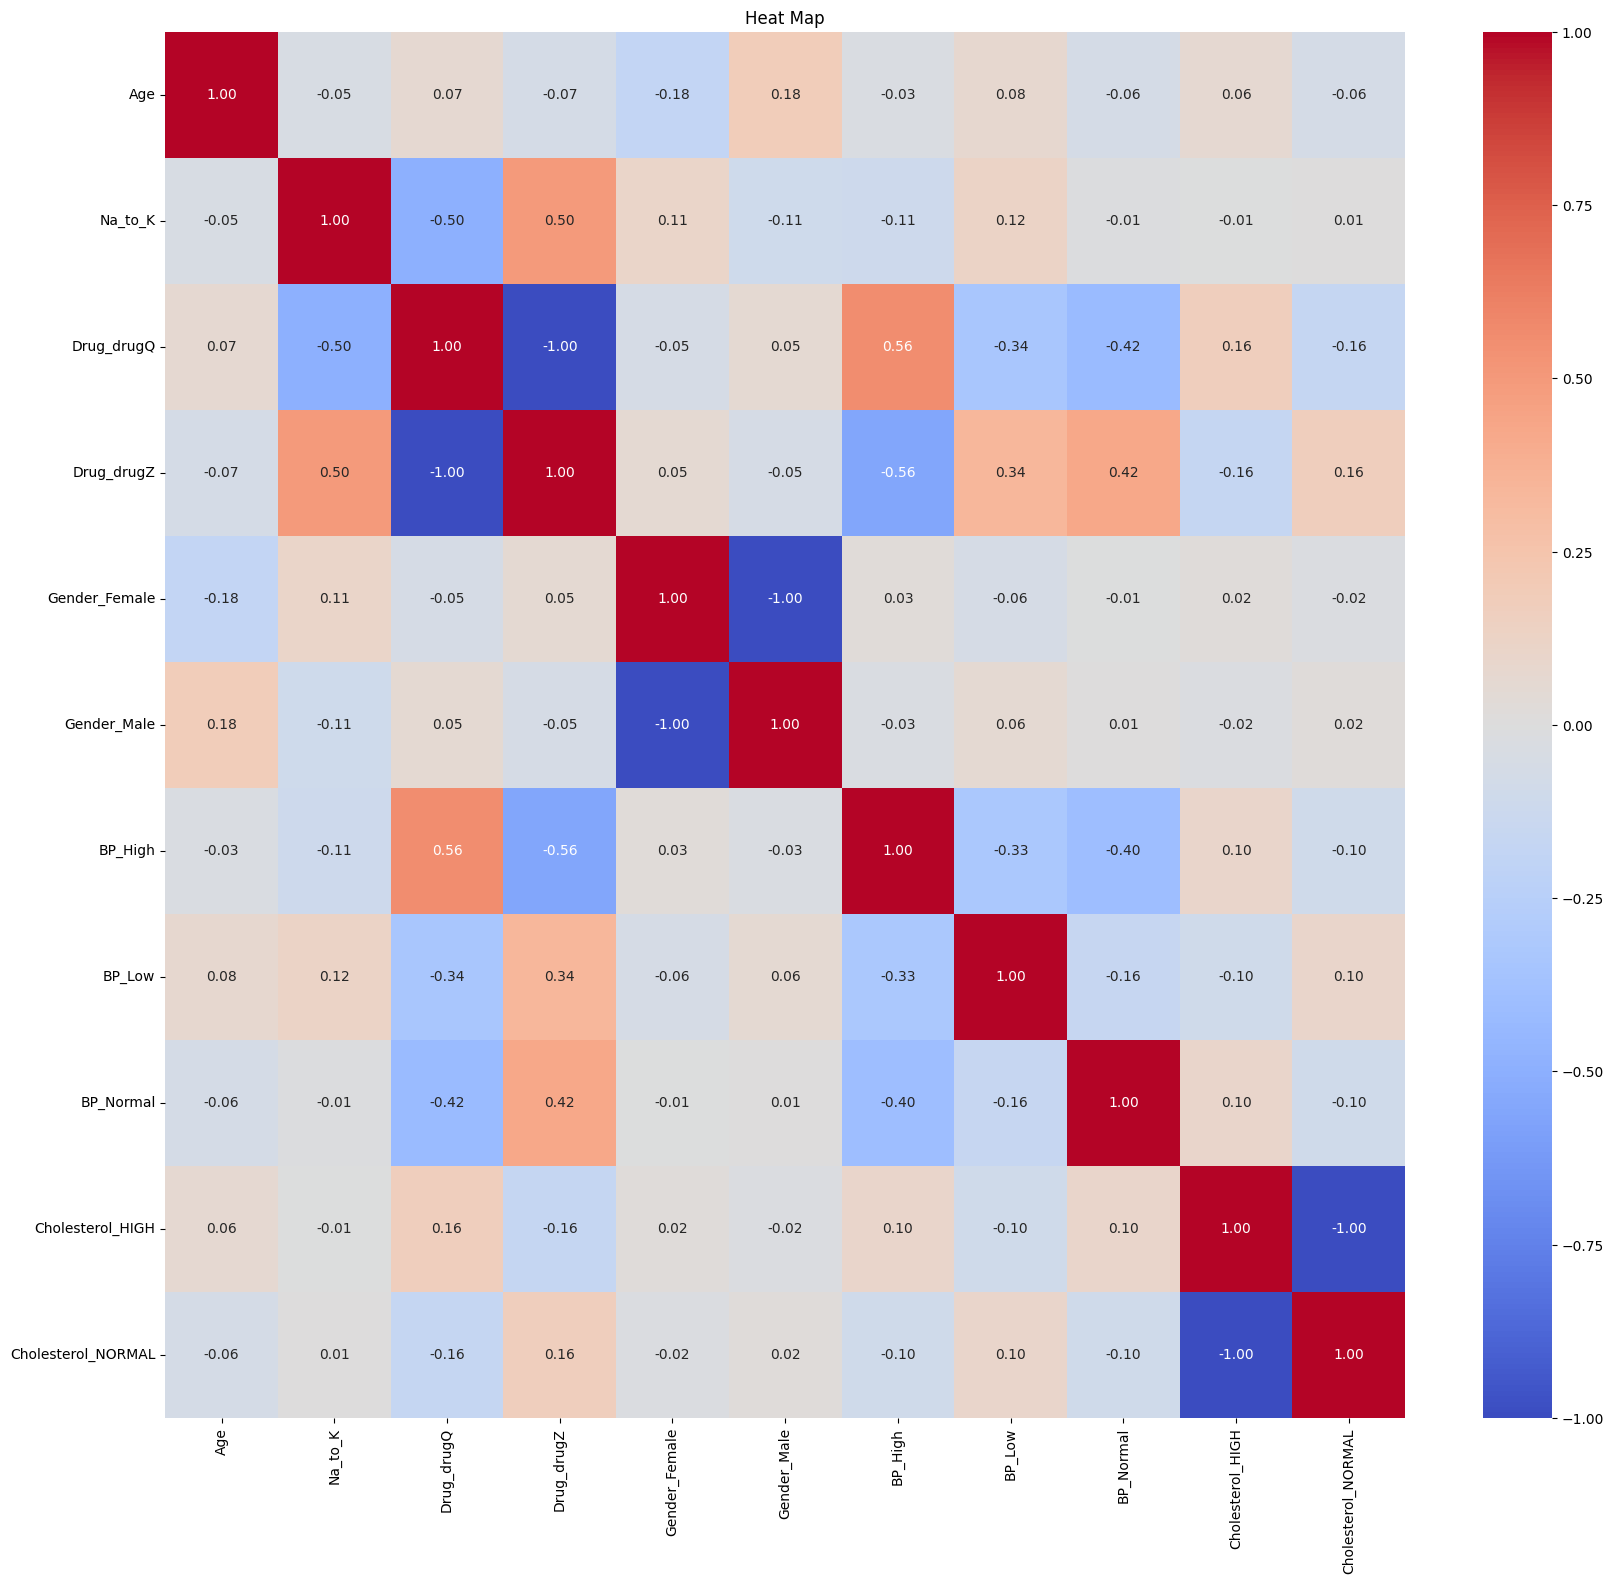

In [181]:

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Drug', 'Gender','BP','Cholesterol'])

# Create a correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heat map using seaborn
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat Map')
plt.show()


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           206 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      280 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.4+ KB


### Define EDA Functions

In [183]:
 # Replace missing values with 'MISSING' in the entire DataFrame
df_filled = df.fillna('MISSING')


In [184]:
# def explore_categorical_check_constant(df, x, fillna = True, placeholder = 'MISSING',
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """BEST VERSION"""
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()

  ## Save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)


  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  ## Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add. atitle with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = temp_df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]

  perc_most_common = freq / len(temp_df) * 100
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")

  return fig, ax

In [185]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")


### Visualizing Each Feature

In [186]:
# Get the list of categorical columns (columns with 'object' data type)
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'BP', 'Cholesterol', 'Drug'], dtype='object')

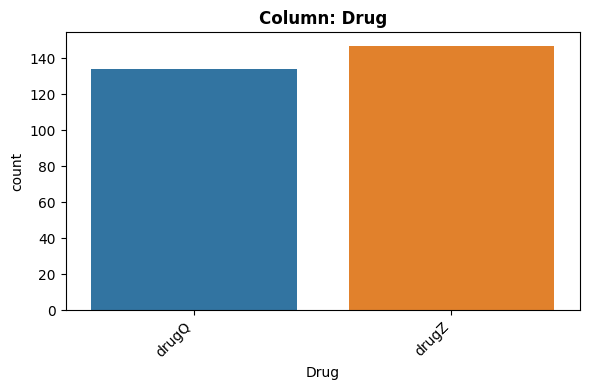

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'drugZ' occurs 147 times (52.31%)


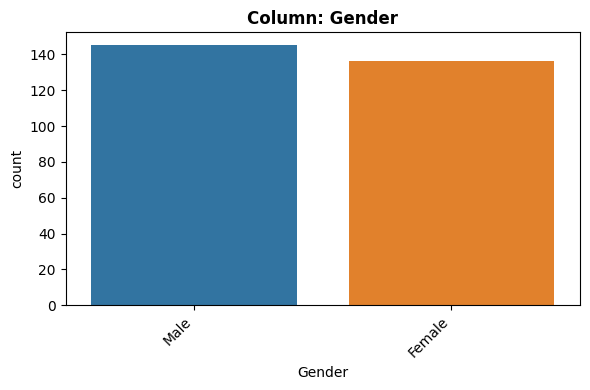

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 145 times (51.6%)


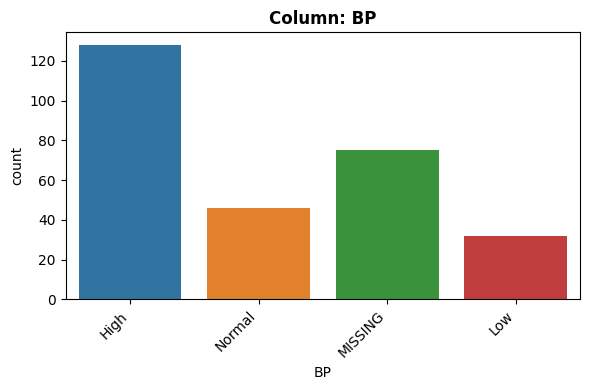

- NaN's Found: 75 (26.69%)
- Unique Values: 4
- Most common value: 'High' occurs 128 times (45.55%)


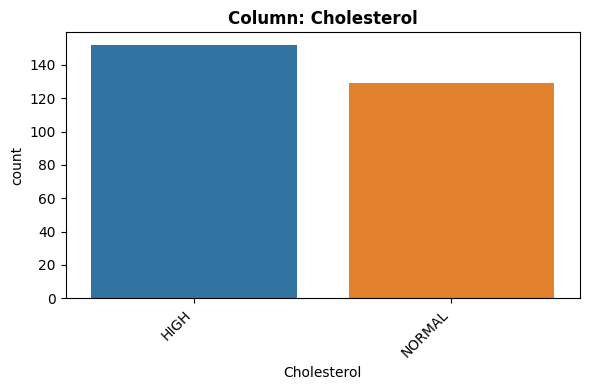

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'HIGH' occurs 152 times (54.09%)


In [187]:
explore_categorical(df, 'Drug');
explore_categorical(df, 'Gender');
explore_categorical(df, 'BP');
explore_categorical(df, 'Cholesterol');


In [188]:

def plot_categorical_vs_target(df_filled, x, y='Drug', figsize=(6, 4), fillna=True, order=None):
    """
    Plot a categorical variable against a target variable using seaborn.

    Parameters:
    - df: DataFrame
    - x: str, the variable to be plotted on the x-axis
    - y: str, the target variable to be plotted on the y-axis (default is 'Drug')
    - figsize: tuple, the size of the figure (default is (6, 4))
    - fillna: bool, whether to fill missing values in 'y' with a placeholder (default is True)
    - placeholder: str, the placeholder value for missing values (default is 'MISSING')
    - order: list or None, the order in which categories should be plotted (default is None)

    Returns:
    - None (displays the plot)
    """


    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=y, data=df_filled, order=order)
    plt.title(f'{x} vs {y}')
    plt.show()





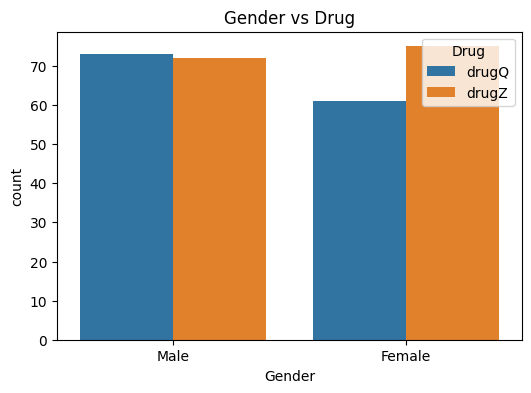

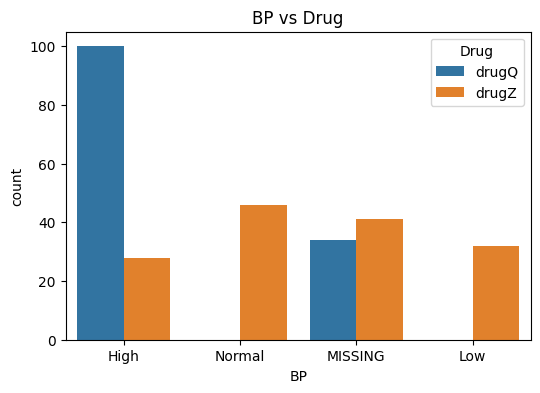

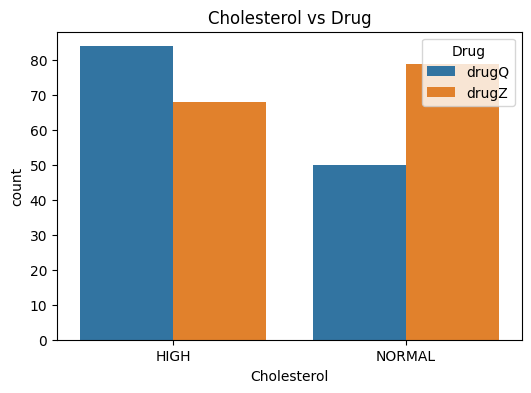

In [189]:

plot_categorical_vs_target(df_filled, x='Gender', y='Drug')
plot_categorical_vs_target(df_filled, x='BP', y='Drug')
plot_categorical_vs_target(df_filled, x='Cholesterol', y='Drug')



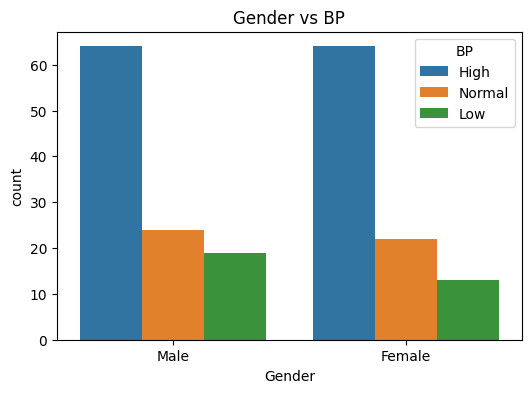

In [190]:
plot_categorical_vs_target(df, x='Gender', y='BP')

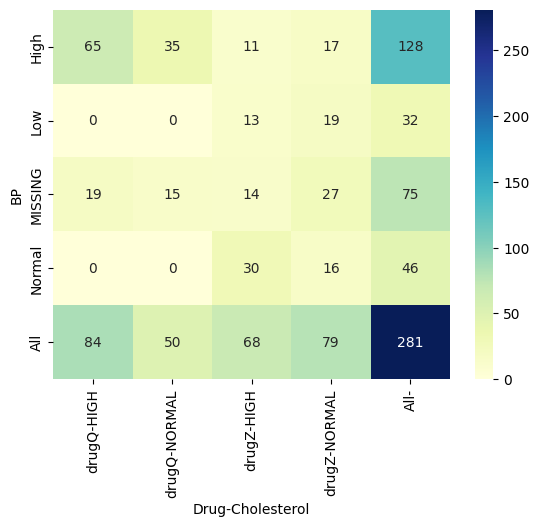

In [191]:
contingency_table = pd.crosstab(index=df_filled['BP'], columns=[ df['Drug'],df['Cholesterol']], margins=True)
# Create a heatmap
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
# Show the plot
plt.show()

the drugQ is only for patients with HIGH BP

In [192]:
# Update 'BP' to 'High' for patients with 'HIGH BP' and 'drugQ' when 'BP' is missing
mask = (df['BP'].isnull()) & (df['Drug'] == 'drugQ')
df.loc[mask, 'BP'] = 'High'


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           240 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      280 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.4+ KB


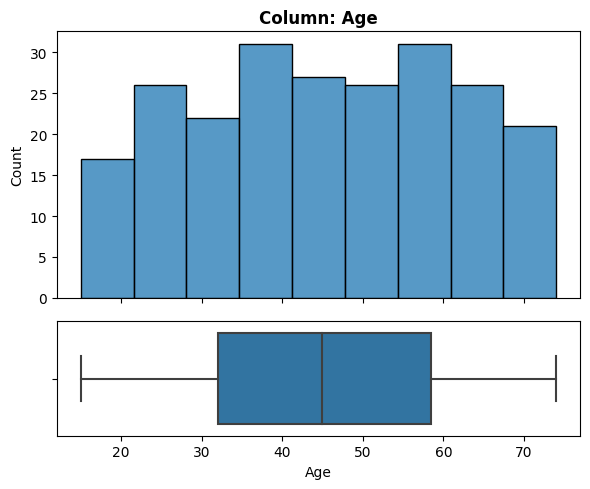

- NaN's Found: 54 (19.22%)


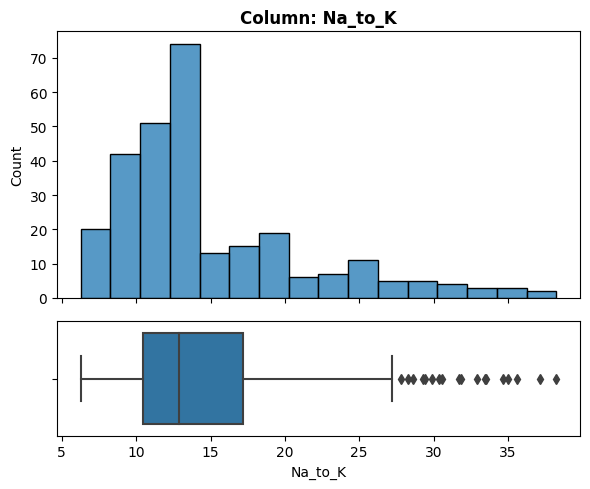

- NaN's Found: 1 (0.36%)


In [194]:
explore_numeric(df, "Age")
explore_numeric(df, "Na_to_K")


In [195]:


def plot_numeric_vs_categorical(df, x, y='Drug', figsize=(8, 6), kind='box'):
    """
    Plot a numeric variable against a categorical target variable using seaborn.

    Parameters:
    - df: DataFrame
    - x: str, the numeric variable to be plotted on the x-axis
    - y: str, the categorical target variable to be plotted on the y-axis (default is 'Drug')
    - figsize: tuple, the size of the figure (default is (8, 6))
    - kind: str, the type of plot to be used ('box', 'violin', 'swarm') (default is 'box')

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=figsize)

    if kind == 'box':
        sns.boxplot(x=x, y=y, data=df)
    elif kind == 'violin':
        sns.violinplot(x=x, y=y, data=df)
    elif kind == 'swarm':
        sns.swarmplot(x=x, y=y, data=df)
    else:
        raise ValueError("Invalid 'kind'. Use 'box', 'violin', or 'swarm'.")

    plt.title(f'{x} vs {y}')
    plt.show()




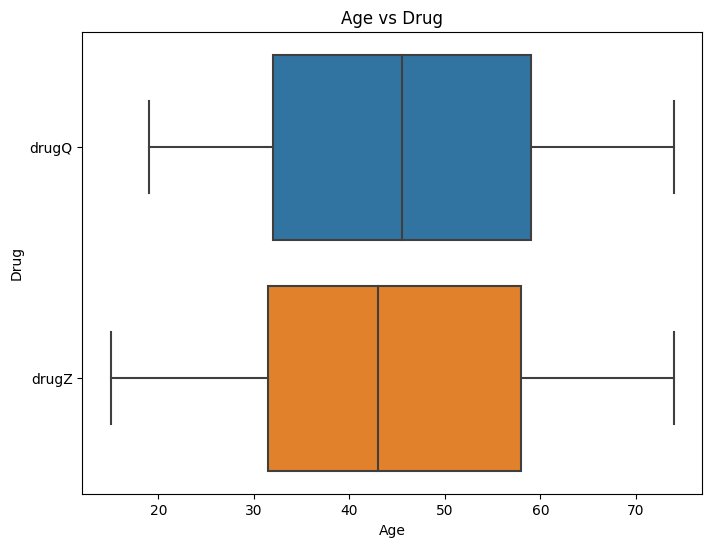

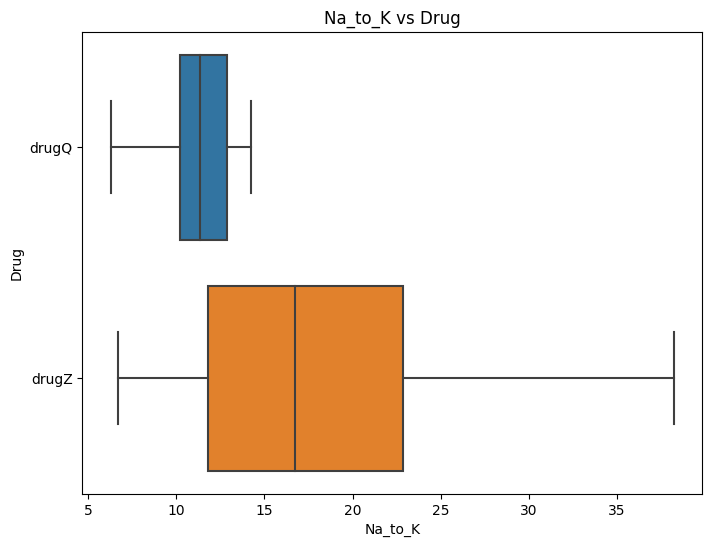

In [196]:

plot_numeric_vs_categorical(df, x='Age', y='Drug', kind='box')
plot_numeric_vs_categorical(df, x='Na_to_K', y='Drug', kind='box')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       281 non-null    object 
 2   BP           240 non-null    object 
 3   Cholesterol  281 non-null    object 
 4   Na_to_K      280 non-null    float64
 5   Drug         281 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.4+ KB


In [198]:
# Drop rows with null values in the 'Na_to_K' column in place
df.dropna(subset=['Na_to_K'], inplace=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          227 non-null    float64
 1   Gender       280 non-null    object 
 2   BP           239 non-null    object 
 3   Cholesterol  280 non-null    object 
 4   Na_to_K      280 non-null    float64
 5   Drug         280 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.3+ KB


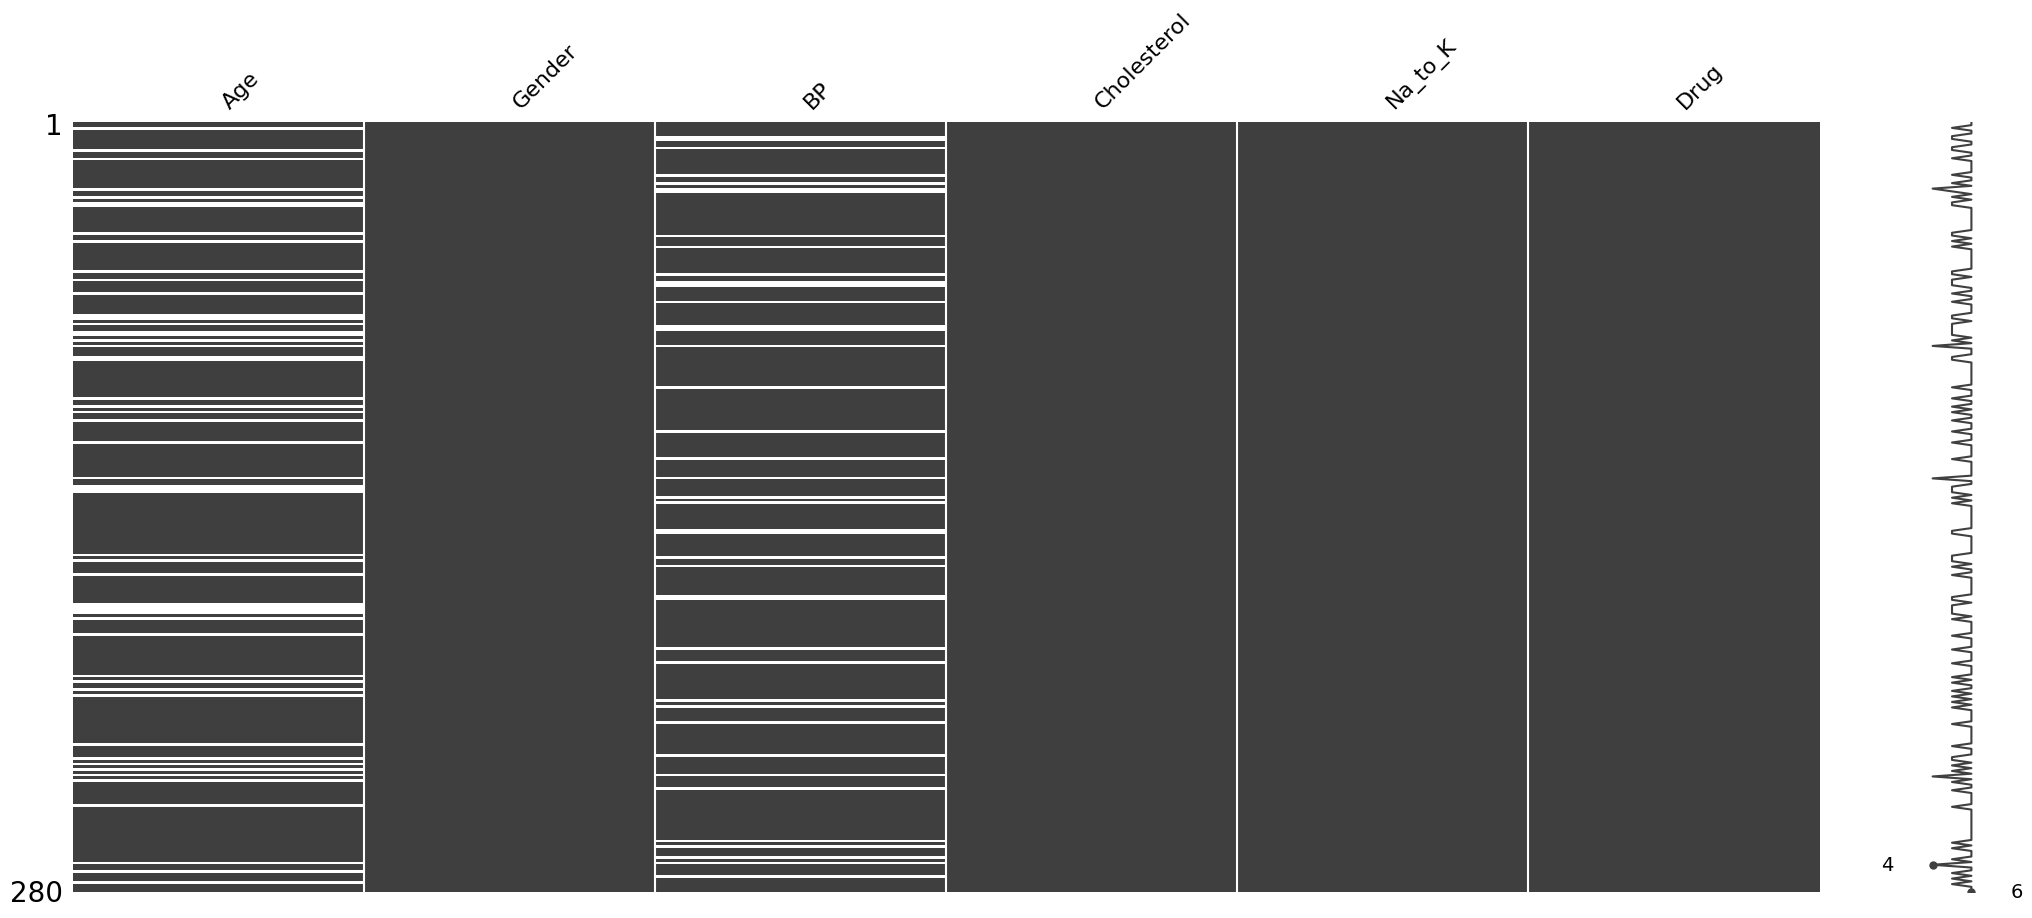

In [200]:
# Visualizing Missing Values with missingno
# Using missingno to view heatmap of NaN's
import missingno as msno
msno.matrix(df);

Health is a sensitive issue; it will be better to drop the rest of the missing values in our dataset

In [201]:
# Drop the 'Age' column
df = df.drop('Age', axis=1)

In [202]:
df= df.dropna()
df

,Gender,BP,Cholesterol,Na_to_K,Drug
0,Male,High,HIGH,13.935,drugQ
1,Female,Normal,HIGH,10.103,drugZ
2,Male,Normal,HIGH,9.084,drugZ
3,Male,Normal,HIGH,16.594,drugZ
4,Female,High,NORMAL,10.977,drugQ
...,...,...,...,...,...
290,Male,High,HIGH,18.295,drugZ
292,Female,Normal,HIGH,10.065,drugZ
293,Male,Low,NORMAL,11.014,drugZ
294,Female,High,NORMAL,9.475,drugQ


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 295
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       239 non-null    object 
 1   BP           239 non-null    object 
 2   Cholesterol  239 non-null    object 
 3   Na_to_K      239 non-null    float64
 4   Drug         239 non-null    object 
dtypes: float64(1), object(4)
memory usage: 11.2+ KB


In [204]:
# by using normalize = True with value_counts, our output is the percentage of each class (written as a decimal)
df['Drug'].value_counts(normalize = True)

drugQ    0.556485
drugZ    0.443515
Name: Drug, dtype: float64

# 3)Modeling

In [205]:
df_model=df.copy()
df_model

,Gender,BP,Cholesterol,Na_to_K,Drug
0,Male,High,HIGH,13.935,drugQ
1,Female,Normal,HIGH,10.103,drugZ
2,Male,Normal,HIGH,9.084,drugZ
3,Male,Normal,HIGH,16.594,drugZ
4,Female,High,NORMAL,10.977,drugQ
...,...,...,...,...,...
290,Male,High,HIGH,18.295,drugZ
292,Female,Normal,HIGH,10.065,drugZ
293,Male,Low,NORMAL,11.014,drugZ
294,Female,High,NORMAL,9.475,drugQ


In [206]:
df_model['Gender'] = df_model['Gender'].replace({'Male': 0, 'Female': 1})
df_model['BP'] = df_model['BP'].replace({'Low': 0, 'Normal': 1, 'High': 2})
df_model['Cholesterol'] = df_model['Cholesterol'].replace({'NORMAL': 0, 'HIGH': 1})

In [207]:
df_model.head()

,Gender,BP,Cholesterol,Na_to_K,Drug
0,0,2,1,13.935,drugQ
1,1,1,1,10.103,drugZ
2,0,1,1,9.084,drugZ
3,0,1,1,16.594,drugZ
4,1,2,0,10.977,drugQ


Our data set is clean and has no missing values

In [208]:
target = 'Drug'
X = df_model.drop(columns=target)
y = df_model[target]
## train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,Gender,BP,Cholesterol,Na_to_K
115,1,0,1,33.486
156,1,2,1,25.355
148,1,2,1,13.303
84,1,2,0,12.495
121,0,2,1,18.703
...,...,...,...,...
127,1,2,1,12.307
17,1,2,1,12.894
111,0,2,1,9.849
215,0,2,0,10.292


In [209]:
X_test

,Gender,BP,Cholesterol,Na_to_K
31,0,1,1,11.953
8,0,2,1,11.009
112,1,2,0,14.239
131,1,1,0,12.295
125,0,2,1,13.972
208,1,0,1,15.036
242,0,2,0,10.446
104,1,2,1,10.292
12,1,2,0,28.632
174,0,2,1,12.856


In [210]:
class_counts = pd.Series(y).value_counts()

print("Class Distribution:")
print(class_counts)
num_classes = len(set(y))
# Check class balance for binary or multiclass
if num_classes == 2:
    # For binary classification, you can check the balance of the two classes
    if class_counts[0] / class_counts[1] > 0.2 and class_counts[1] / class_counts[0] > 0.2:
        print("Reasonably Balanced Binary Classes")
    else:
        print("Imbalanced Binary Classes")
else:
    # For multiclass classification, you can check the balance of each class
    min_class_count = min(class_counts)
    max_class_count = max(class_counts)
    balance_threshold = 0.2  # Adjust this threshold based on your preference for class balance

    if (max_class_count / min_class_count) <= (1 + balance_threshold):
        print("Reasonably Balanced Multiclass Classes")
    else:
        print("Imbalanced Multiclass Classes")

Class Distribution:
drugQ    133
drugZ    106
Name: Drug, dtype: int64
Reasonably Balanced Binary Classes


In [211]:
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [212]:
# Define the column transformer for different feature types
numeric_features = X_train.select_dtypes("number").columns
categorical_features =X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Build the pipeline with the DecisionTreeClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)





Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00        34
       drugZ       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[34  0]
 [ 0 26]]


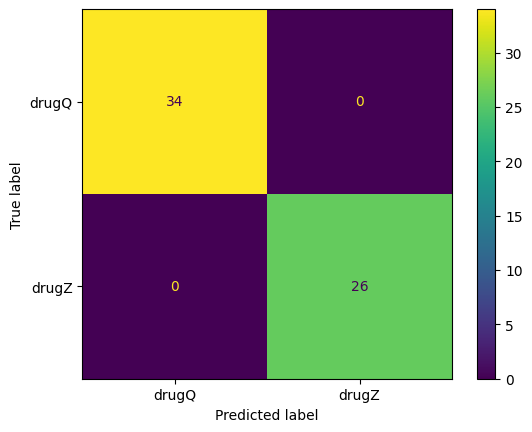

In [213]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, predictions);


In [214]:
# Build the pipeline with the BaggingClassifier using DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42))
])

# Fit the model
bagging_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions_de_tree = bagging_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions_de_tree)
classification_rep = classification_report(y_test, predictions_de_tree)
conf_matrix = confusion_matrix(y_test, predictions_de_tree)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00        34
       drugZ       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[34  0]
 [ 0 26]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


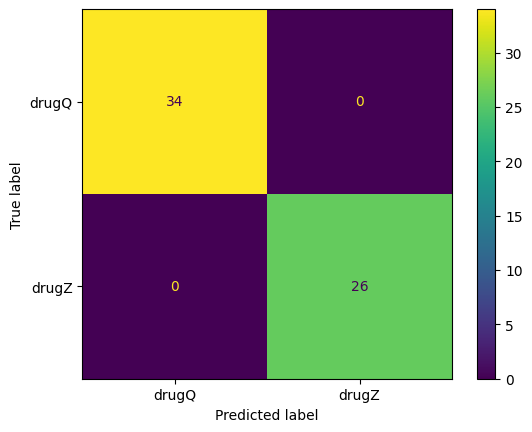

In [215]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions_de_tree);


In [216]:


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Build the pipeline with the RandomForestClassifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions_r_class = rf_pipeline.predict(X_test)





Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       drugQ       1.00      1.00      1.00        34
       drugZ       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[34  0]
 [ 0 26]]


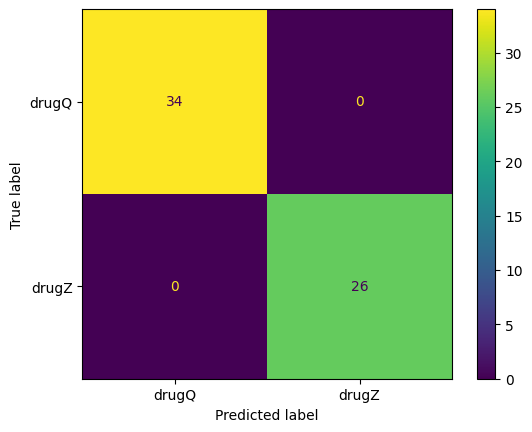

In [217]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions_r_class)
classification_rep = classification_report(y_test, predictions_r_class)
conf_matrix = confusion_matrix(y_test, predictions_r_class)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)
ConfusionMatrixDisplay.from_predictions(y_test, predictions_r_class);

There were no false positives

There were no false negatives

All of the models performed very well